<center> 
    <h1> <font color = 'Blue'> CVEN5301 : Advanced Geospatial Analysis </h1>
 </center>

<center> 
    <h1> <font color = 'Black'> Mini Project 1 </h1>
 </center>

<h2> <font color = 'purple'> Kushum KC </h2>

<h3> <font color = 'red' >Problem 1: Identify the bridges that were surveyed in 2023 but not in 2022.</h3>


### Solution: Bridges that were surveyed in 2023 but not in 2022 along with its map

*Step 1: Loading the libraries**

In [312]:
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")     #Suppress warnings

*Step 2: Setting working directory*

In [313]:
path = 'C:/Users/kckus/OneDrive - Lamar University/0000Fall2024/AdGeospetial/Assignments/Mini_Project1/WD'
os.chdir(path)

*Step 3: Loading the csv data*

In [314]:
df_2022= pd.read_csv('2022_TXbridge.csv', low_memory = False)    # the dataframe has the mixed data type columns

In [315]:
df_2023= pd.read_csv('2023_TXbridge.csv', low_memory = False)

*Step 4: Identifying Bridges surveyd in 2023 but not in 2022 and save it under new dataframe based on unique stucture Id which is under the column name:"STRUCTURE_NUMBER_008"*

In [316]:
UniqueBridge_2023= df_2023[~df_2023['STRUCTURE_NUMBER_008'].isin(df_2022['STRUCTURE_NUMBER_008'])] 

*Step 5: Export the unique bridges (bridges surveyed in 2023 but not in 2022) into a new csv file for further analysis.*

***Check for the number of rows obtained in the unique bridges for 2023***

In [317]:
print(f"Number of Bridges Surveyed in 2022: {len(df_2022)}")
print(f"Number of Bridges Surveyed in 2023: {len(df_2023)}")
print(f"Number of Bridges Surveyed in 2023 but not in 2022: {len(UniqueBridge_2023)}")

Number of Bridges Surveyed in 2022: 55701
Number of Bridges Surveyed in 2023: 43754
Number of Bridges Surveyed in 2023 but not in 2022: 518


In [318]:
UniqueBridge_2023.to_csv('UniqueBridges_2023.csv', index=False)

*Step 6: To plot those bridges surveyed in 2023 but not in 2022 in a map following steps are followed:*

*Step 6.1:Import geopandas, matplotlib and other libraries*

In [319]:
import geopandas as gpd
from matplotlib import pyplot as plt
import matplotlib_map_utils as mapu
from shapely.geometry import Point

*Step 6.2: Function to Convert the latitude and logitude into DD MM SS format*

In [320]:
def convert_to_decimal(coord):
    # Convert the coordinate to a string to count the number of digits
    coord_str = str(coord)
    
    if len(coord_str) == 8:                   #Format XX degrees XX minutes XX.XX seconds
        degrees = int(coord_str[:2])
        minutes = int(coord_str[2:4])
        seconds = float(coord_str[4:]) / 100
    elif len(coord_str) == 9:                 #Format XXX degrees XX minutes XX.XX seconds
        degrees = int(coord_str[:3])
        minutes = int(coord_str[3:5])
        seconds = float(coord_str[5:]) / 100
    else:
        raise ValueError("Unexpected coordinate length")
    
    # Convert to decimal degrees
    decimal_degrees = degrees + minutes / 60 + seconds / 3600
    return decimal_degrees


*Step 6.3: Apply the function to bridge surveyed in 2023 but not in 2022 dataset*

In [321]:
UniqueBridge_2023['LAT_DD'] = UniqueBridge_2023['LAT_016'].apply(convert_to_decimal)
UniqueBridge_2023['LONG_DD'] = (-1) * UniqueBridge_2023['LONG_017'].apply(convert_to_decimal)
UniqueBridge_2023.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,FUTURE_ADT_114,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,LAT_DD,LONG_DD
9,48.0,000021594-62610,1,6,0,0,0,2,203,0,...,15.0,2041.0,NaN,Y,63.0,G,8.0,127.98,32.680500,-94.145833
115,48.0,010600AA2130001,1,4,1,2130,0,1,119,0,...,1.0,1900.0,NaN,N,48.0,G,9.0,97.60,33.371656,-95.774397
874,48.0,010920AA0339004,1,4,1,0,0,1,181,0,...,110.0,2040.0,NaN,N,48.0,G,7.0,180.91,33.406739,-96.440031
1253,48.0,011130AA4712001,1,4,1,4712,0,1,223,0,...,41.0,2040.0,30.5,N,48.0,G,8.0,96.38,33.158519,-95.720886
1695,48.0,011170AA1032001,1,4,1,1032,0,1,231,0,...,1.0,1900.0,NaN,N,48.0,G,8.0,120.08,33.187658,-96.135772


*Step 6.4: Import and plot the texas shape file in python*

In [322]:
texas_gpkg = gpd.read_file("Texas_State_Boundary_Detailed_-308047856486462547.gpkg")   
#Reproject the texas boundary mao to WGS84 CRS
print("Texas Boundary CRS:", texas_gpkg.crs)

# If the CRS is not WGS84 (EPSG:4326), reproject it to match the bridges' CRS
if texas_gpkg.crs != "EPSG:4326":
    texas_gpkg = texas_gpkg.to_crs(epsg=4326)

Texas Boundary CRS: EPSG:3857


*Step 6.5: Plotting the texas boundary and the bridges that are surveyed in 2023 but not in 2022*

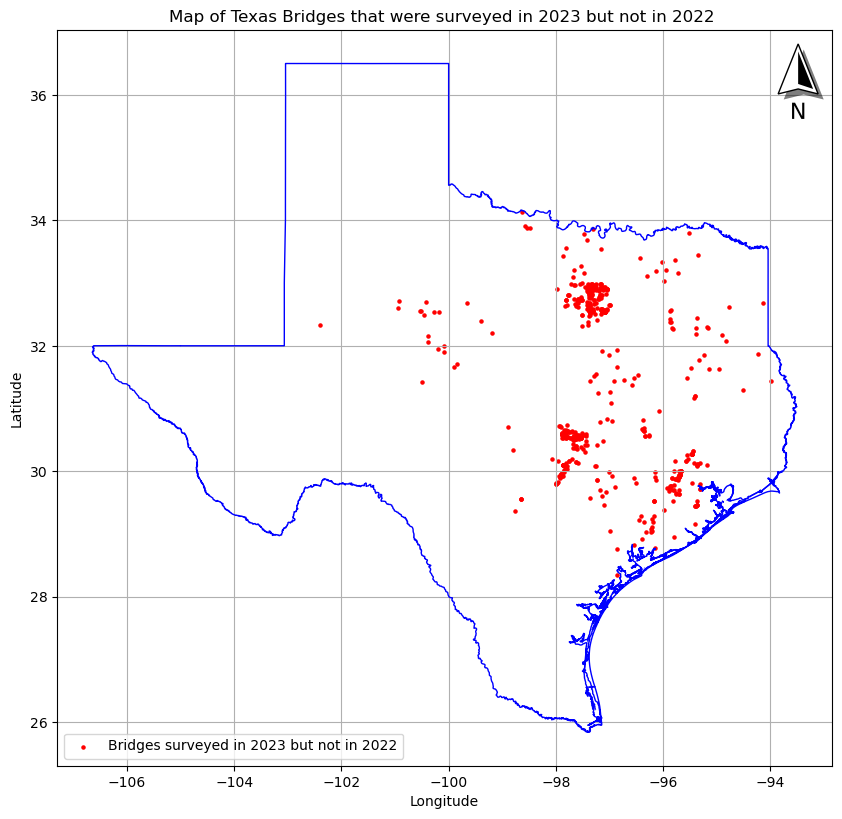

In [323]:
#Converting pandas Dataframe to a GeoDataFrame by creating geometry column from the Latitude and Longitude
geometry = [Point(xy) for xy in zip(UniqueBridge_2023['LONG_DD'], UniqueBridge_2023['LAT_DD'])]   
UniqueBridge_2023_gdf = gpd.GeoDataFrame(UniqueBridge_2023, geometry=geometry)               
UniqueBridge_2023_gdf.set_crs(epsg=4326, inplace=True)        #Cordinate system: WGS84 CRS (EPSG:4326)

# Plot of texas boundry and the bridge as points
fig, ax = plt.subplots(figsize=(10, 10))
texas_gpkg.boundary.plot(ax=ax, edgecolor='blue', linewidth=1)  #Plot of Texas boundary (outline only)
UniqueBridge_2023_gdf.plot(ax=ax, marker='o', color='red', markersize=5, label='Bridges surveyed in 2023 but not in 2022')  #Plot of bridges (red points)

# Plot Display
plt.title("Map of Texas Bridges that were surveyed in 2023 but not in 2022 ")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
mapu.north_arrow.north_arrow(ax=ax, location='upper right', rotation={"degrees": 0})
ax.legend(loc='lower left')
plt.grid()
plt.show()

#### Discussion: Coordinate System and Data Compatibility

The map above represents the Texas bridges surveyed in 2023 but not in 2022. Before visualizing, it was crucial to ensure that the Texas map and the bridge coordinates were in the same coordinate reference system (CRS). This is because differing CRS between datasets can lead to inaccurate visualizations where the locations do not align properly.

The coordinate system of the Texas boundary map was checked using the `crs` attribute. If the CRS was not in **WGS84** (EPSG:4326), it was reprojected using the `to_crs()` function. WGS84 is the most common coordinate system used for global data, especially for latitude and longitude coordinates.

Additionally, bridge locations in the dataset were converted to decimal degrees using the custom-made `convert_to_decimal()` function. This function handled the conversion of coordinates in degrees, minutes, and seconds format (both 8 and 9 digits long) into decimal degrees, ensuring that all bridge coordinates were in a consistent format. This conversion was critical for proper placement of bridge points on the map.

Once the map and bridge data were confirmed to be in the same CRS, the visualization was performed without any alignment issues, ensuring the accurate plotting of bridge locations.


---

<h3> <font color = 'red' >Problem 2: Reclassification in 2 categories (satisfactory 1 and less than satisfactory 0) of the rating of Deck, Culvert and channel/Channel Protection columns of the dataframe.</h3>

<h3> Solution: Reclassification </h3>

*Step 1: Loading the libraries*

In [324]:
import numpy as np

*Step 2: Reclassification of the Rating of the Deck, Culvert and Channel/ Channel Protection into satisfactory (1) and less than satisfactory (0)*

*Step 2.1: Converting any non-numeric text values to NaN in the relevant columns*

In [325]:
#for 2022 Bridge dataset
df_2022['DECK_COND_058'] = pd.to_numeric(df_2022['DECK_COND_058'], errors='coerce')
df_2022['CULVERT_COND_062'] = pd.to_numeric(df_2022['CULVERT_COND_062'], errors='coerce')
df_2022['CHANNEL_COND_061'] = pd.to_numeric(df_2022['CHANNEL_COND_061'], errors='coerce')

#for 2023 Bridge dataset
df_2023['DECK_COND_058'] = pd.to_numeric(df_2023['DECK_COND_058'], errors='coerce')
df_2023['CULVERT_COND_062'] = pd.to_numeric(df_2023['CULVERT_COND_062'], errors='coerce')
df_2023['CHANNEL_COND_061'] = pd.to_numeric(df_2023['CHANNEL_COND_061'], errors='coerce')

*Step 2.2: Creating new columns with binary values (0 and 1) based on the reclassification criteria (keep NaN as NaN)*

In [326]:
#for 2022 bridge dataset
df_2022['DECK_RECLASSIFED'] = np.where(pd.isna(df_2022['DECK_COND_058']), np.nan, np.where(df_2022['DECK_COND_058'] > 5, 1, 0))
df_2022['CULVERT_RECLASSIFED'] = np.where(pd.isna(df_2022['CULVERT_COND_062']), np.nan, np.where(df_2022['CULVERT_COND_062'] > 5, 1, 0))
df_2022['CHANNEL_RECLASSIFED'] = np.where(pd.isna(df_2022['CHANNEL_COND_061']), np.nan, np.where(df_2022['CHANNEL_COND_061'] > 5, 1, 0))
df_2022.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,DECK_RECLASSIFED,CULVERT_RECLASSIFED,CHANNEL_RECLASSIFED
0,48.0,0000000L2015318,1,6,4,0,0,0,375,0,...,2035,NaN,Y,68,G,7,145.50,NaN,1.0,1.0
1,48.0,000021521-00101,1,6,0,0,0,2,71,0,...,2038,NaN,Y,63,G,7,150.72,1.0,NaN,1.0
2,48.0,000021521-00181,1,6,0,0,0,2,71,0,...,2038,NaN,Y,63,G,7,74.40,1.0,NaN,1.0
3,48.0,000021521-TMP20,1,6,1,0,0,2,71,0,...,2038,NaN,Y,63,G,8,91.91,1.0,NaN,1.0
4,48.0,000021525-00012,1,6,0,0,0,2,245,0,...,2040,NaN,Y,63,P,4,204.30,1.0,NaN,1.0


In [327]:
#for 2023 bridge dataset
df_2023['DECK_RECLASSIFED'] = np.where(pd.isna(df_2023['DECK_COND_058']), np.nan, np.where(df_2023['DECK_COND_058'] > 5, 1, 0))
df_2023['CULVERT_RECLASSIFED'] = np.where(pd.isna(df_2023['CULVERT_COND_062']), np.nan, np.where(df_2023['CULVERT_COND_062'] > 5, 1, 0))
df_2023['CHANNEL_RECLASSIFED'] = np.where(pd.isna(df_2023['CHANNEL_COND_061']), np.nan, np.where(df_2023['CHANNEL_COND_061'] > 5, 1, 0))
df_2023.head()

,STATE_CODE_001,STRUCTURE_NUMBER_008,RECORD_TYPE_005A,ROUTE_PREFIX_005B,SERVICE_LEVEL_005C,ROUTE_NUMBER_005D,DIRECTION_005E,HIGHWAY_DISTRICT_002,COUNTY_CODE_003,PLACE_CODE_004,...,YEAR_OF_FUTURE_ADT_115,MIN_NAV_CLR_MT_116,FED_AGENCY,SUBMITTED_BY,BRIDGE_CONDITION,LOWEST_RATING,DECK_AREA,DECK_RECLASSIFED,CULVERT_RECLASSIFED,CHANNEL_RECLASSIFED
0,48.0,0000000L2015318,1,6,4,0,0,0,375,0,...,2035.0,NaN,Y,68.0,G,7.0,169.84,NaN,1.0,1.0
1,48.0,000021521-00101,1,6,0,0,0,2,71,0,...,2042.0,NaN,Y,63.0,F,6.0,150.72,1.0,NaN,1.0
2,48.0,000021521-00181,1,6,0,0,0,2,71,0,...,2042.0,NaN,Y,63.0,G,7.0,74.40,1.0,NaN,1.0
3,48.0,000021521-TMP20,1,6,1,0,0,2,71,0,...,2042.0,NaN,Y,63.0,G,7.0,91.91,1.0,NaN,1.0
4,48.0,000021525-00012,1,6,0,0,0,2,245,0,...,2042.0,NaN,Y,63.0,P,4.0,204.30,1.0,NaN,1.0


*Step 2.3: For the unique bridges that were surveyed in 2023 but not in 2022*

In [328]:
UniqueBridge_2023= df_2023[~df_2023['STRUCTURE_NUMBER_008'].isin(df_2022['STRUCTURE_NUMBER_008'])] 

#### Discussion:

Reclassification of the columns, `Rating of Deck Condition`, `Rating of Culvert Condition`, and `Channel/Channel Protection` was done based on the "Recording and Codig Guide for the Inventory and Appraisal of National Bridges - FHWA Report (page numbers: 37- 42)". The rating values greater than 5 (6 to 9) was reclassified as the 'Satisfactory' condition and the rating values less than and equal to 5 (0 to 5) was considered 'Less than Satisfactory'.

---

<h3> <font color = 'red' >Problem 3: Logistic Regression for predicting the probability of bridge elements being less than Satisfactory.</h3>

<h3> Solution:</h3>

*Step 1: Loading needed Library and Parameter Selection for Logistic Regression*

In [329]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

*Step 1.1: Calculating the age of the bridge based on the built year data provided in NBI dataset*

In [330]:
df_2022['AGE'] = 2024 - df_2022['YEAR_BUILT_027']  #AGE variable based on YEAR_BUILT_027
df_2023['AGE'] = 2024 - df_2023['YEAR_BUILT_027'] 
UniqueBridge_2023['AGE'] = 2024 - UniqueBridge_2023['YEAR_BUILT_027'] 

*Step 1.2: Selecting Indepent variables (X) based on Literature review*

*The parameters were selected based on the literature reviews, then those paramters are used to fit a model using the logistic regression*

In [331]:
X_columns = [
    'LAT_016',  
    'LONG_017',  
    'TOLL_020',  
    'MAINTENANCE_021',  
    'FUNCTIONAL_CLASS_026', 
    'YEAR_BUILT_027',                #Year Built (used to calculate Bridge Age)
    'TRAFFIC_LANES_ON_028A',         #Lanes on Structure
    'ADT_029',                       #Average Daily Traffic (ADT)
    'DATE_OF_INSPECT_090',           #Inspection Interval
    'INSPECT_FREQ_MONTHS_091',       #Inspection Frequency
    'YEAR_RECONSTRUCTED_106',        #Reconstruction
    'PERCENT_ADT_TRUCK_109',         #Average daily truck traffic (ADTT)
    'DEGREES_SKEW_034',             
    'STRUCTURE_KIND_043A',           #Structural Material/Design
    'STRUCTURE_TYPE_043B',           #Type of Design and/or Construction
    'MAIN_UNIT_SPANS_045',           #Number of Spans in Main Unit
    'MAX_SPAN_LEN_MT_048',           #Length of Maximum Span
    'STRUCTURE_LEN_MT_049',          #Structure Length
    'ROADWAY_WIDTH_MT_051',          #Bridge Roadway Width Curb-To-Curb
    'DECK_STRUCTURE_TYPE_107',       #Deck Structure Type
    'SURFACE_TYPE_108A',             #Type of Wearing Surface
    'MEMBRANE_TYPE_108B',            #Type of Membrane
    'DECK_PROTECTION_108C',          #Deck Protection 
    'AGE'
]

#Creating a DataFrame with the selected variables
X = df_2022[X_columns]
X.head()

,LAT_016,LONG_017,TOLL_020,MAINTENANCE_021,FUNCTIONAL_CLASS_026,YEAR_BUILT_027,TRAFFIC_LANES_ON_028A,ADT_029,DATE_OF_INSPECT_090,INSPECT_FREQ_MONTHS_091,...,STRUCTURE_TYPE_043B,MAIN_UNIT_SPANS_045,MAX_SPAN_LEN_MT_048,STRUCTURE_LEN_MT_049,ROADWAY_WIDTH_MT_051,DECK_STRUCTURE_TYPE_107,SURFACE_TYPE_108A,MEMBRANE_TYPE_108B,DECK_PROTECTION_108C,AGE
0,35185702,101560762,3,68,9,2008,2,100,321,24,...,19,2,9.1,19.4,8.0,N,6,0,0,16
1,29362100,94272880,3,63,9,2005,1,1,418,48,...,1,2,14.9,31.4,4.3,9,1,0,0,19
2,29362940,94254920,3,63,9,2005,1,1,418,48,...,1,1,14.6,15.5,4.3,9,1,0,0,19
3,29365160,94324020,3,63,9,2012,2,100,418,48,...,5,1,8.8,10.1,8.4,9,6,0,0,12
4,29413300,94044860,3,63,9,1950,1,80,121,24,...,2,14,4.0,45.4,3.7,8,7,0,0,74


*Step 1.3: Filtering the non-numeric datas and removing NaN from dataset then performing the mankendall test for the Multicollinearity among the independent variables*

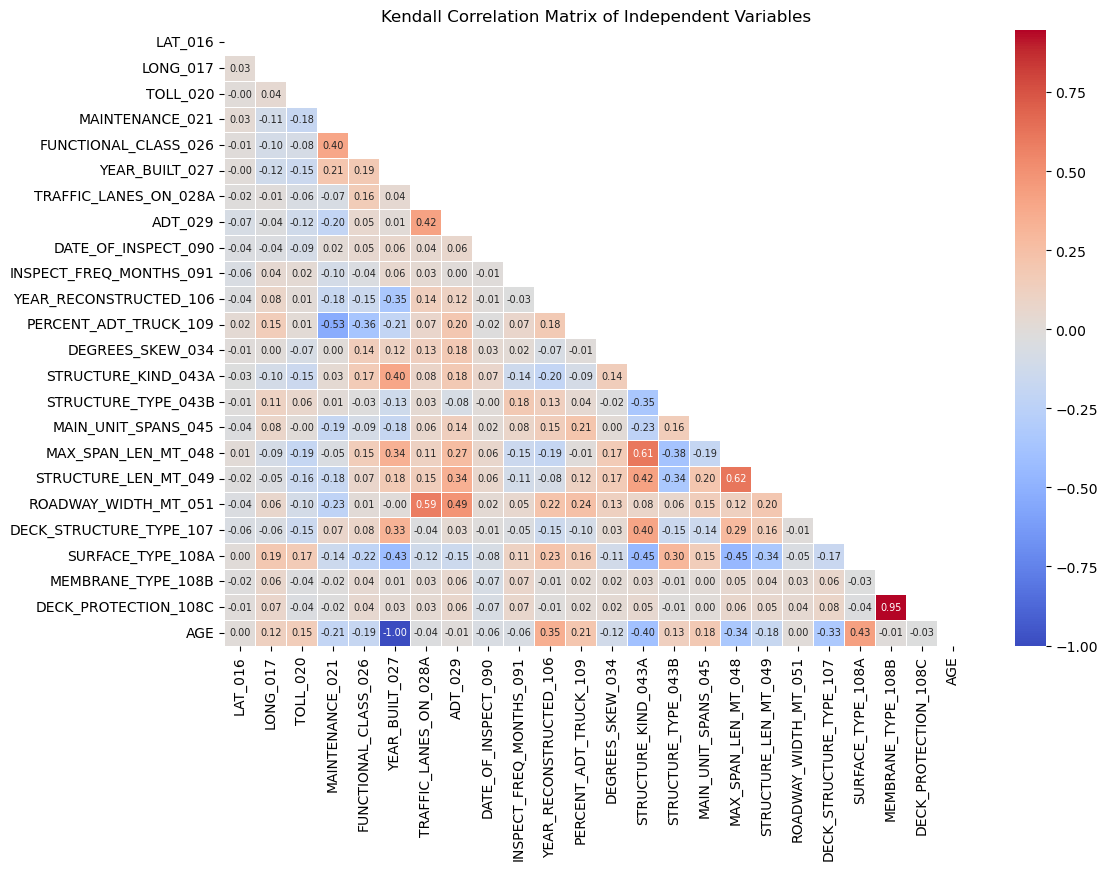

In [332]:
X = X.apply(pd.to_numeric, errors='coerce')   #Converting non-numeric values to NaN
X = X.dropna()                                #Removing rows with any missing values

corr = X.corr(method='kendall')               #Check for collinearity, using Kendall correlations matrix

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8)) 
mask = np.triu(np.ones_like(corr, dtype=bool))     #Mask for the upper triangle
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, mask=mask, annot_kws={"size": 7})
plt.title('Kendall Correlation Matrix of Independent Variables')
plt.show()

*Step 1.4: List of independent variables (Columns) selected after the literature reviews and Multicollinearity test*

In [333]:
X_Columns = ['STRUCTURE_NUMBER_008', 'LAT_016', 'LONG_017', 'TOLL_020', 'MAINTENANCE_021', 'FUNCTIONAL_CLASS_026', 'ADT_029', 'DATE_OF_INSPECT_090',
             'INSPECT_FREQ_MONTHS_091', 'YEAR_RECONSTRUCTED_106','PERCENT_ADT_TRUCK_109', 'DEGREES_SKEW_034', 'STRUCTURE_TYPE_043B', 
             'MAIN_UNIT_SPANS_045', 'STRUCTURE_LEN_MT_049', 'ROADWAY_WIDTH_MT_051', 'AGE']

All_Columns = ['STRUCTURE_NUMBER_008', 'LAT_016', 'LONG_017', 'TOLL_020', 'MAINTENANCE_021', 'FUNCTIONAL_CLASS_026', 'ADT_029', 'DATE_OF_INSPECT_090',
               'INSPECT_FREQ_MONTHS_091', 'YEAR_RECONSTRUCTED_106','PERCENT_ADT_TRUCK_109', 'DEGREES_SKEW_034', 'STRUCTURE_TYPE_043B', 
               'MAIN_UNIT_SPANS_045', 'STRUCTURE_LEN_MT_049', 'ROADWAY_WIDTH_MT_051', 'AGE', 'DECK_RECLASSIFED', 'CHANNEL_RECLASSIFED', 
               'CULVERT_RECLASSIFED']

*Step 2: Getting the complete dataset for the selected columns of 2022 and UniqueBridge_2023 bridge data*

In [334]:
Final_2022 = df_2022[All_Columns]
UniqueBridgeFinal_2023 = UniqueBridge_2023[All_Columns]

*Step 3: Understanding the dataset for the modeling (Distribution of the datasets)*

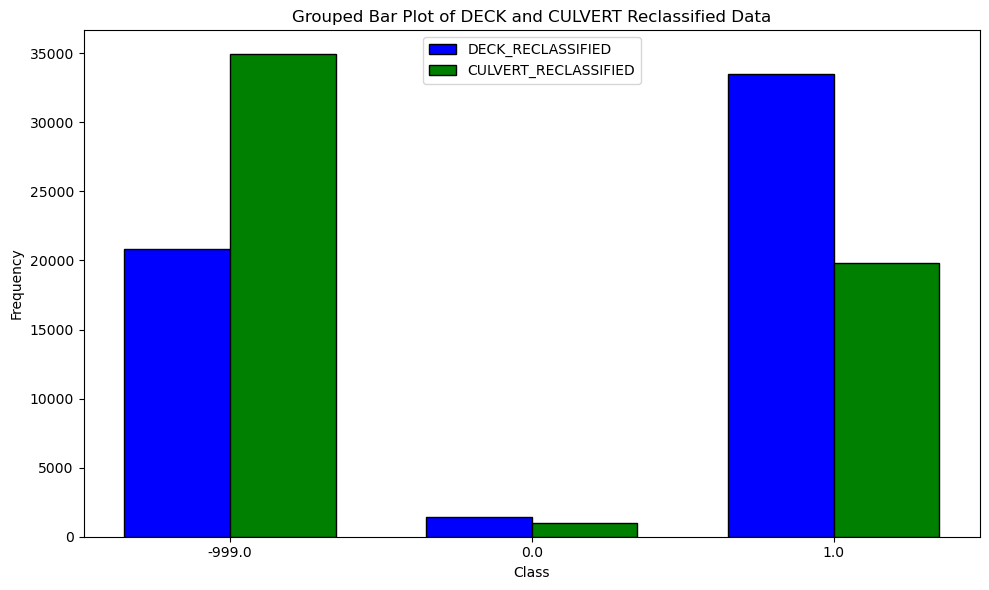

In [335]:
# For 2022 Bridge data
df = Final_2022[['DECK_RECLASSIFED', 'CULVERT_RECLASSIFED']].fillna(-999)

#Histogram plot
classes = sorted(set(df['DECK_RECLASSIFED'].unique()).union(set(df['CULVERT_RECLASSIFED'].unique())))  # Get the unique class values for both columns
# Count the frequency of each class in DECK_RECLASSIFIED and CULVERT_RECLASSIFIED
deck_counts = df['DECK_RECLASSIFED'].value_counts().reindex(classes, fill_value=0)
culvert_counts = df['CULVERT_RECLASSIFED'].value_counts().reindex(classes, fill_value=0)

# Create a bar plot
x = np.arange(len(classes))    # Define the position for each class (x-axis positions)
bar_width = 0.35              # Set the width for each bar
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, deck_counts, width=bar_width, label='DECK_RECLASSIFIED', color='blue', edgecolor='black')        # Bars for DECK_RECLASSIFIED
plt.bar(x + bar_width/2, culvert_counts, width=bar_width, label='CULVERT_RECLASSIFIED', color='green', edgecolor='black') # Bars for CULVERT_RECLASSIFIED

# Add labels and title
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Grouped Bar Plot of DECK and CULVERT Reclassified Data')
plt.xticks(x, classes)                        # Tick positions and labels
plt.legend()
# Show the plot
plt.tight_layout()
plt.show()

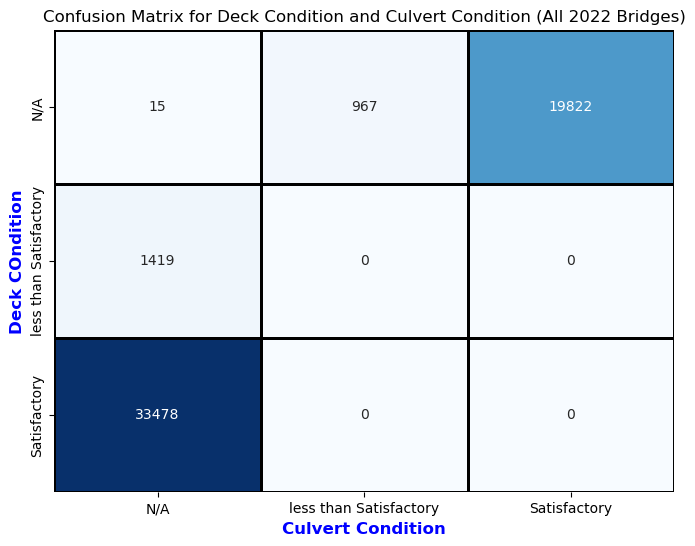

In [336]:
# For 2022 Bridge data
df = Final_2022[['DECK_RECLASSIFED', 'CULVERT_RECLASSIFED']].fillna(-999)

#confusion matrix 
confusion_matrixx = pd.crosstab(df['DECK_RECLASSIFED'], df['CULVERT_RECLASSIFED'])
#print(confusion_matrix)

#Rename the binary classified dataset
confusion_matrixx.index = confusion_matrixx.index.map({0: 'less than Satisfactory', 1: 'Satisfactory', -999: 'N/A'})
confusion_matrixx.columns = confusion_matrixx.columns.map({0: 'less than Satisfactory', 1: 'Satisfactory', -999: 'N/A'})

#Plot the figure with the renaming
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrixx, annot=True, fmt='g', cmap='Blues', cbar=False, linewidths=1, linecolor='black')
plt.title('Confusion Matrix for Deck Condition and Culvert Condition (All 2022 Bridges)')
plt.xlabel('Culvert Condition', fontsize=12, fontweight='bold', color='blue')
plt.ylabel('Deck COndition', fontsize=12, fontweight='bold', color='blue')
plt.show()

#### Understandings from the 2022 Bridge Dataset:

- Deck Condition data and the Culvert condition data refers to completely different structures so these datasets are mutually exclusive.
- There is very little `Class 0 (Less than Satisfactory)` data compared to the `Class 1 (Satisfactory)` data for both the Rating of Deck condition and Rating of Culvert Condition. Therefore, we can say the data is heavely skewed.
- As the data is imbalancd so it cannot be used directly for modeling (Logistic Regression model) as it will not provide assessment in prediction of the `Less than Satisfactory` condition.

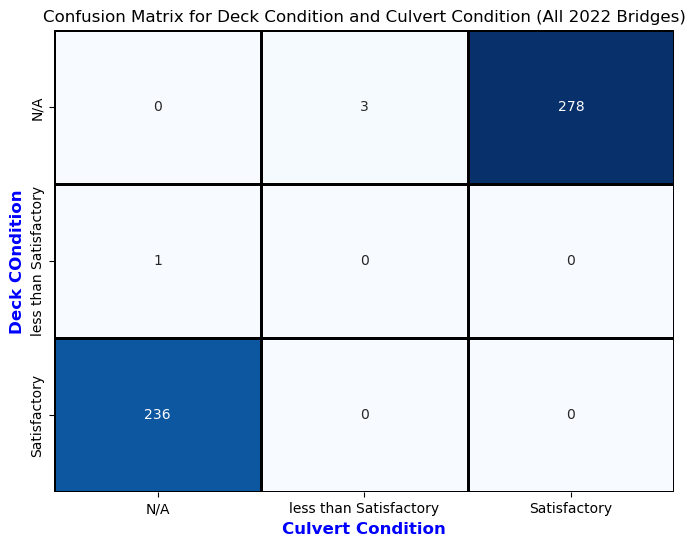

In [337]:
# For the unique bridge data Bridge data
df = UniqueBridgeFinal_2023[['DECK_RECLASSIFED', 'CULVERT_RECLASSIFED']].fillna(-999)

#confusion matrix 
confusion_matrixx = pd.crosstab(df['DECK_RECLASSIFED'], df['CULVERT_RECLASSIFED'])
#print(confusion_matrix)

#Rename the binary classified dataset
confusion_matrixx.index = confusion_matrixx.index.map({0: 'less than Satisfactory', 1: 'Satisfactory', -999: 'N/A'})
confusion_matrixx.columns = confusion_matrixx.columns.map({0: 'less than Satisfactory', 1: 'Satisfactory', -999: 'N/A'})

#Plot the figure with the renaming
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrixx, annot=True, fmt='g', cmap='Blues', cbar=False, linewidths=1, linecolor='black')
plt.title('Confusion Matrix for Deck Condition and Culvert Condition (All 2022 Bridges)')
plt.xlabel('Culvert Condition', fontsize=12, fontweight='bold', color='blue')
plt.ylabel('Deck COndition', fontsize=12, fontweight='bold', color='blue')
plt.show()

#### Understandings from the Unique Bridge Dataset:
- For Rating condition of Culvert there is only one data available for `Less than Satisfactory` class and for Rating of Deck Condition the same data count is only 3. This is less than 1% of the available data in both condition.
- The data is imbalaced. So, just for the cheking purpose, the logistic model will also be developed using 2022 dataset by 80-20 split and considering the imbalace that is also present within that dataset. 


*Step 4: Logistic Regression model*

In [338]:
Xnew_Columns = ['LAT_016', 'LONG_017', 'TOLL_020', 'MAINTENANCE_021', 'FUNCTIONAL_CLASS_026', 'ADT_029', 'DATE_OF_INSPECT_090',
             'INSPECT_FREQ_MONTHS_091', 'YEAR_RECONSTRUCTED_106','PERCENT_ADT_TRUCK_109', 'DEGREES_SKEW_034', 'STRUCTURE_TYPE_043B', 
             'MAIN_UNIT_SPANS_045', 'STRUCTURE_LEN_MT_049', 'ROADWAY_WIDTH_MT_051', 'AGE']

**Step 4.1: Logistic Regression model  for the Rating of the deck condition (model 1)**

*Step 4.1.1: Model with 2022 bridge data as training dataset and Unique bridges as the testing dataset.**

In [339]:
#Regression Model 1:
#Compilling the necessary columns and droping NaN rows
Deck_Columns = Xnew_Columns + ['DECK_RECLASSIFED']  
Train_df = Final_2022[Deck_Columns]
Train_df = Train_df.dropna()
Test_df = UniqueBridgeFinal_2023[Deck_Columns]
Test_df = Test_df.dropna()

ForPlot_deck = Test_df.copy()   #For Plotting

#Normalizing the data to be used for logistic regression
Train_df[Train_df.columns] = MinMaxScaler().fit_transform(Train_df[Train_df.columns])
Test_df[Test_df.columns] = MinMaxScaler().fit_transform(Test_df[Test_df.columns])  

#Defining the X and Y variables for the model
X_Train = Train_df[Xnew_Columns]
Y_Train = Train_df['DECK_RECLASSIFED']

X_Test = Test_df[Xnew_Columns]
Y_Test = Test_df['DECK_RECLASSIFED']

#Using Logistic Regression with class weights to handle imbalance
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')

# Fit the model on the training data
logreg.fit(X_Train, Y_Train)

# Make predictions on the test data
Y_pred = logreg.predict(X_Test)
ForPlot_deck['Y_pred'] = Y_pred     #For Plot

# Evaluate the model
accuracy = accuracy_score(Y_Test, Y_pred)
conf_matrix = confusion_matrix(Y_Test, Y_pred)
class_report = classification_report(Y_Test, Y_pred)

# Print evaluation metrics
print("Accuracy with class_weight='balanced': {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy with class_weight='balanced': 73.13%
Confusion Matrix:
 [[  1   0]
 [ 61 165]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.02      1.00      0.03         1
         1.0       1.00      0.73      0.84       226

    accuracy                           0.73       227
   macro avg       0.51      0.87      0.44       227
weighted avg       1.00      0.73      0.84       227



#### Discussion on Logistic Regression with `class_weight='balanced'` and `max_iter=1000`

When using `LogisticRegression(max_iter=1000, class_weight='balanced')`, the model automatically adjusts the weights of each class based on their frequency in the dataset. This is particularly useful when dealing with imbalanced classes, where one class (e.g., "Satisfactory") may significantly outnumber the other (e.g., "Not Satisfactory"). The `class_weight='balanced'` parameter ensures that the model does not favor the majority class by assigning higher penalties to misclassifications of the minority class, improving its ability to predict underrepresented cases.

Additionally, `max_iter=1000` increases the number of iterations allowed for the optimization algorithm to converge, ensuring better model convergence for complex datasets.


---

*Step 4.1.2: If the 2022 Bridge Dataset is to be split into 80:20 for 2022 dataset, how would the model perform in terms of accuracy in a comparatively diverse test dataset.*

In [340]:
#Compilling the necessary columns and droping NaN rows
Deck_Columns = Xnew_Columns + ['DECK_RECLASSIFED']  
Deck_df = Final_2022[Deck_Columns]
Deck_df = Deck_df.dropna()

#Normalizing the data to be used for logistic regression
Deck_df[Deck_df.columns] = MinMaxScaler().fit_transform(Deck_df[Deck_df.columns])

#Defining the X and Y variables for the model
X_clean = Deck_df[Xnew_Columns]
Y_clean = Deck_df['DECK_RECLASSIFED']

#Split the data into training (80%) and testing (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X_clean, Y_clean, test_size=0.2, random_state=42)

#Using Logistic Regression with class weights to handle imbalance
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')

# Fit the model on the training data
logreg.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

# Print evaluation metrics
print("Accuracy with class_weight='balanced': {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy with class_weight='balanced': 70.04%
Confusion Matrix:
 [[ 209   65]
 [2016 4656]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.09      0.76      0.17       274
         1.0       0.99      0.70      0.82      6672

    accuracy                           0.70      6946
   macro avg       0.54      0.73      0.49      6946
weighted avg       0.95      0.70      0.79      6946



---

*Step 4.1.3: Predicting with Pre-Trained Logistic Regression Model-1 (using 80:20 split of 2022 dataset for developing the model and using unique bridge dataset for testing (predicting).*

In [341]:
# Compiling the necessary columns and dropping NaN rows for test data
Deck_Columns = Xnew_Columns + ['DECK_RECLASSIFED']  
Test_df = UniqueBridgeFinal_2023[Deck_Columns]
Test_df = Test_df.dropna()

ForPlot_deck = Test_df.copy()   #For Plotting

# Normalizing the test data
Test_df[Test_df.columns] = MinMaxScaler().fit_transform(Test_df[Test_df.columns])

# Defining the X and Y variables for the test data
X_Test = Test_df[Xnew_Columns]
Y_Test = Test_df['DECK_RECLASSIFED']

# Using the pre-fitted logistic regression model (logreg) to make predictions on the test data
Y_pred = logreg.predict(X_Test)

ForPlot_deck['Y_pred'] = Y_pred     #For Plot

#Probability
Y_pred_prob = logreg.predict_proba(X_Test)[:, 1]  # Get probability of class 1
ForPlot_deck['Y_pred_prob'] = Y_pred_prob  # Add predicted probabilities for plotting

# Evaluate the model on the test data
accuracy = accuracy_score(Y_Test, Y_pred)
conf_matrix = confusion_matrix(Y_Test, Y_pred)
class_report = classification_report(Y_Test, Y_pred)

# Print evaluation metrics
print("Accuracy with class_weight='balanced': {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy with class_weight='balanced': 59.03%
Confusion Matrix:
 [[  1   0]
 [ 93 133]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.01      1.00      0.02         1
         1.0       1.00      0.59      0.74       226

    accuracy                           0.59       227
   macro avg       0.51      0.79      0.38       227
weighted avg       1.00      0.59      0.74       227



---

**Step 4.2: Logistic Regression model  for the Rating of the Culvert condition (model 2)**

*Step 4.2.1: Model with 2022 bridge data as training dataset and Unique bridges as the testing dataset.**

In [342]:
#Regression Model 2:
#Compilling the necessary columns and droping NaN rows
Culvert_Columns = Xnew_Columns + ['CULVERT_RECLASSIFED']  
Train_df = Final_2022[Culvert_Columns]
Train_df = Train_df.dropna()
Test_df = UniqueBridgeFinal_2023[Culvert_Columns]
Test_df = Test_df.dropna()

#Normalizing the data to be used for logistic regression
Train_df[Train_df.columns] = MinMaxScaler().fit_transform(Train_df[Train_df.columns])
Test_df[Test_df.columns] = MinMaxScaler().fit_transform(Test_df[Test_df.columns])  

#Defining the X and Y variables for the model
X_Train = Train_df[Xnew_Columns]
Y_Train = Train_df['CULVERT_RECLASSIFED']

X_Test = Test_df[Xnew_Columns]
Y_Test = Test_df['CULVERT_RECLASSIFED']

#Using Logistic Regression with class weights to handle imbalance
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')

# Fit the model on the training data
logreg.fit(X_Train, Y_Train)

# Make predictions on the test data
Y_pred = logreg.predict(X_Test)

# Evaluate the model
accuracy = accuracy_score(Y_Test, Y_pred)
conf_matrix = confusion_matrix(Y_Test, Y_pred)
class_report = classification_report(Y_Test, Y_pred)

# Print evaluation metrics
print("Accuracy with class_weight='balanced': {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy with class_weight='balanced': 17.19%
Confusion Matrix:
 [[  3   0]
 [212  41]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.01      1.00      0.03         3
         1.0       1.00      0.16      0.28       253

    accuracy                           0.17       256
   macro avg       0.51      0.58      0.15       256
weighted avg       0.99      0.17      0.28       256



---

*Step 4.2.2: If the 2022 Bridge Dataset is to be split into 80:20 for 2022 dataset, how would the model perform in terms of accuracy in a comparatively diverse test dataset.*

In [343]:
#Compilling the necessary columns and droping NaN rows
Culvert_Columns = Xnew_Columns + ['CULVERT_RECLASSIFED']  
Culvert_df = Final_2022[Culvert_Columns]
Culvert_df = Culvert_df.dropna()

#Normalizing the data to be used for logistic regression
Culvert_df[Culvert_df.columns] = MinMaxScaler().fit_transform(Culvert_df[Culvert_df.columns])

#Defining the X and Y variables for the model
X_clean = Culvert_df[Xnew_Columns]
Y_clean = Culvert_df['CULVERT_RECLASSIFED']

#Split the data into training (80%) and testing (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X_clean, Y_clean, test_size=0.2, random_state=42)

#Using Logistic Regression with class weights to handle imbalance
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')

# Fit the model on the training data
logreg.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

# Print evaluation metrics
print("Accuracy with class_weight='balanced': {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy with class_weight='balanced': 61.12%
Confusion Matrix:
 [[ 140   56]
 [1555 2392]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.08      0.71      0.15       196
         1.0       0.98      0.61      0.75      3947

    accuracy                           0.61      4143
   macro avg       0.53      0.66      0.45      4143
weighted avg       0.93      0.61      0.72      4143



------

*Step 4.2.3: Predicting with Pre-Trained Logistic Regression Model-2 (using 80:20 split of 2022 dataset for developing the model and using unique bridge dataset for testing (predicting).*

In [344]:
# Regression Model 2: Using already trained logistic regression model (logreg)

# Compiling the necessary columns and dropping NaN rows for test data
Culvert_Columns = Xnew_Columns + ['CULVERT_RECLASSIFED']  
Test_df = UniqueBridgeFinal_2023[Culvert_Columns]
Test_df = Test_df.dropna()

ForPlot_culvert = Test_df.copy()   #For Plotting

# Normalizing the test data
Test_df[Test_df.columns] = MinMaxScaler().fit_transform(Test_df[Test_df.columns])

# Defining the X and Y variables for the test data
X_Test = Test_df[Xnew_Columns]
Y_Test = Test_df['CULVERT_RECLASSIFED']

# Using the pre-fitted logistic regression model (logreg) to make predictions on the test data
Y_pred = logreg.predict(X_Test)
ForPlot_culvert['Y_pred'] = Y_pred     #For Plot

#Probability
Y_pred_prob = logreg.predict_proba(X_Test)[:, 1]  # Get probability of class 1
ForPlot_culvert['Y_pred_prob'] = Y_pred_prob  # Add predicted probabilities for plotting

# Evaluate the model on the test data
accuracy = accuracy_score(Y_Test, Y_pred)
conf_matrix = confusion_matrix(Y_Test, Y_pred)
class_report = classification_report(Y_Test, Y_pred)

# Print evaluation metrics
print("Accuracy with class_weight='balanced': {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy with class_weight='balanced': 21.48%
Confusion Matrix:
 [[  3   0]
 [201  52]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.01      1.00      0.03         3
         1.0       1.00      0.21      0.34       253

    accuracy                           0.21       256
   macro avg       0.51      0.60      0.18       256
weighted avg       0.99      0.21      0.34       256



------

***Step 4.3: Logistic Regression model  for the Rating of the Channel and Channel Protection (model 3)***

*Step 4.3.1: Model with 2022 bridge data as training dataset and Unique bridges as the testing dataset.**

In [345]:
#Regression Model 3:
#Compilling the necessary columns and droping NaN rows
Channel_Columns = Xnew_Columns + ['CHANNEL_RECLASSIFED']  
Train_df = Final_2022[Channel_Columns]
Train_df = Train_df.dropna()
Test_df = UniqueBridgeFinal_2023[Channel_Columns]
Test_df = Test_df.dropna()

#Normalizing the data to be used for logistic regression
Train_df[Train_df.columns] = MinMaxScaler().fit_transform(Train_df[Train_df.columns])
Test_df[Test_df.columns] = MinMaxScaler().fit_transform(Test_df[Test_df.columns])  

#Defining the X and Y variables for the model
X_Train = Train_df[Xnew_Columns]
Y_Train = Train_df['CHANNEL_RECLASSIFED']

X_Test = Test_df[Xnew_Columns]
Y_Test = Test_df['CHANNEL_RECLASSIFED']

#Using Logistic Regression with class weights to handle imbalance
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')

# Fit the model on the training data
logreg.fit(X_Train, Y_Train)

# Make predictions on the test data
Y_pred = logreg.predict(X_Test)

# Evaluate the model
accuracy = accuracy_score(Y_Test, Y_pred)
conf_matrix = confusion_matrix(Y_Test, Y_pred)
class_report = classification_report(Y_Test, Y_pred)

# Print evaluation metrics
print("Accuracy with class_weight='balanced': {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy with class_weight='balanced': 4.67%
Confusion Matrix:
 [[ 11   0]
 [449  11]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.02      1.00      0.05        11
         1.0       1.00      0.02      0.05       460

    accuracy                           0.05       471
   macro avg       0.51      0.51      0.05       471
weighted avg       0.98      0.05      0.05       471



*Step 4.3.2: If the 2022 Bridge Dataset is to be split into 80:20 for 2022 dataset, how would the model perform in terms of accuracy in a comparatively diverse test dataset.*

In [346]:
#Compilling the necessary columns and droping NaN rows
Channel_Columns = Xnew_Columns + ['CHANNEL_RECLASSIFED']  
Channel_df = Final_2022[Channel_Columns]
Channel_df = Channel_df.dropna()

#Normalizing the data to be used for logistic regression
Channel_df[Channel_df.columns] = MinMaxScaler().fit_transform(Channel_df[Channel_df.columns])

#Defining the X and Y variables for the model
X_clean = Channel_df[Xnew_Columns]
Y_clean = Channel_df['CHANNEL_RECLASSIFED']

#Split the data into training (80%) and testing (20%) sets
X_train, X_test, Y_train, Y_test = train_test_split(X_clean, Y_clean, test_size=0.2, random_state=42)

#Using Logistic Regression with class weights to handle imbalance
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')

# Fit the model on the training data
logreg.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
class_report = classification_report(Y_test, Y_pred)

# Print evaluation metrics
print("Accuracy with class_weight='balanced': {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy with class_weight='balanced': 60.28%
Confusion Matrix:
 [[ 557  273]
 [3333 4915]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.14      0.67      0.24       830
         1.0       0.95      0.60      0.73      8248

    accuracy                           0.60      9078
   macro avg       0.55      0.63      0.48      9078
weighted avg       0.87      0.60      0.69      9078



------

*Step 4.3.3: Predicting with Pre-Trained Logistic Regression Model-3 (using 80:20 split of 2022 dataset for developing the model and using unique bridge dataset for testing (predicting).*

In [347]:
# Regression Model 3: Using already trained logistic regression model (logreg)

# Compiling the necessary columns and dropping NaN rows for test data
Channel_Columns = Xnew_Columns + ['CHANNEL_RECLASSIFED']  
Test_df = UniqueBridgeFinal_2023[Channel_Columns]
Test_df = Test_df.dropna()

ForPlot_channel = Test_df.copy()   #For Plotting

# Normalizing the test data
Test_df[Test_df.columns] = MinMaxScaler().fit_transform(Test_df[Test_df.columns])

# Defining the X and Y variables for the test data
X_Test = Test_df[Xnew_Columns]
Y_Test = Test_df['CHANNEL_RECLASSIFED']

# Using the pre-fitted logistic regression model (logreg) to make predictions on the test data
Y_pred = logreg.predict(X_Test)

ForPlot_channel['Y_pred'] = Y_pred     #For Plot

#Probability
Y_pred_prob = logreg.predict_proba(X_Test)[:, 1]  # Get probability of class 1
ForPlot_channel['Y_pred_prob'] = Y_pred_prob  # Add predicted probabilities for plotting

# Evaluate the model on the test data
accuracy = accuracy_score(Y_Test, Y_pred)
conf_matrix = confusion_matrix(Y_Test, Y_pred)
class_report = classification_report(Y_Test, Y_pred)

# Print evaluation metrics
print("Accuracy with class_weight='balanced': {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy with class_weight='balanced': 5.94%
Confusion Matrix:
 [[ 11   0]
 [443  17]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.02      1.00      0.05        11
         1.0       1.00      0.04      0.07       460

    accuracy                           0.06       471
   macro avg       0.51      0.52      0.06       471
weighted avg       0.98      0.06      0.07       471



------

#### Discussion of Model Performance

The bridges that were sampled in 2023, but not in 2022, were extracted for analysis. The initial approach was to use the bridges sampled in 2022 as the training data and the 2023 unique bridges as the testing data. However, the testing data displayed low to zero variation between the two classes, "Satisfactory" and "Not Satisfactory," which affected the model’s performance.

Due to this issue, the 2022 bridges were instead used for both training and testing purposes. This allowed for a more accurate analysis of the model's performance. When splitting the 2022 data into training and testing sets, all three models demonstrated an accuracy range of 60% to 70%. During training, **class_weight='balanced'** was applied to account for the class imbalance in the dataset. This parameter adjusts the weights assigned to each class in the model, ensuring that the model does not become biased towards the majority class and appropriately handles the underrepresented class.

Despite the balanced sampling, the model performed poorly on the 2023-only bridges, yielding exceptionally low accuracy. This suggests that the characteristics of the 2023 bridges differ significantly from those of 2022, making it harder for the model to generalize its predictions. Nonetheless, the results are presented below to illustrate the observed patterns and model outcomes.


------

<h3> <font color = 'red' >Problem 4: Visualization in map using color coding of the probabilities to indicate the risk of failure.</h3>

<h3> Solution:</h3>

In [348]:
# Function to convert latitude and longitude to decimal degrees and create GeoDataFrame
def create_geodataframe(df, lat_col, long_col):
    df['LAT_DD'] = df[lat_col].apply(convert_to_decimal)
    df['LONG_DD'] = (-1) * df[long_col].apply(convert_to_decimal)  # For western hemisphere longitudes
    geometry = [Point(xy) for xy in zip(df['LONG_DD'], df['LAT_DD'])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry)
    gdf.set_crs(epsg=4326, inplace=True)
    return gdf

# Convert lat/lon for ForPlot_deck, ForPlot_channel, and ForPlot_culvert
ForPlot_gdfD = create_geodataframe(ForPlot_deck, 'LAT_016', 'LONG_017')
ForPlot_gdfC = create_geodataframe(ForPlot_channel, 'LAT_016', 'LONG_017')
ForPlot_gdfCu = create_geodataframe(ForPlot_culvert, 'LAT_016', 'LONG_017')

#### Side-by-Side Plot of Texas Bridges with Predictions

This plot visualizes three datasets (`Deck Condition`, `Channel Condition`, and `Culvert Condition`) side by side. Each dataset is plotted with distinct markers and colors to represent predictions (`Satisfactory` and `Not Satisfactory`). The Texas boundary is shown in blue, and the data points are overlaid on top of it:

- **Green** markers indicate predictions of `Satisfactory Condition`.
- **Red** markers indicate predictions of `Not Satifactory Condition`.

Markers:
- **Triangles** for Deck data.
- **Squares** for Channel data.
- **Circles** for Culvert data.


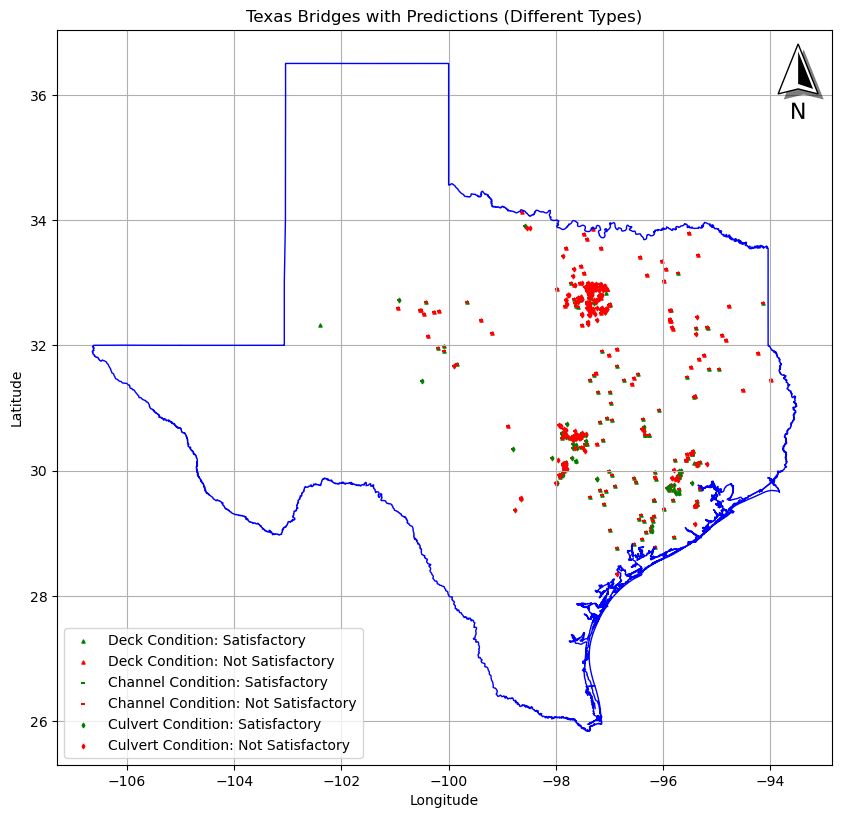

In [349]:
# Plotting all three datasets on the same map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Texas boundary (assuming texas_gpkg is your Texas boundary GeoDataFrame)
texas_gpkg.boundary.plot(ax=ax, edgecolor='blue', linewidth=1)

# Plot deck points (Y_pred=1 in green triangles, Y_pred=0 in red triangles)
ForPlot_gdfD[ForPlot_gdfD['Y_pred'] == 1].plot(ax=ax, marker='^', color='green', markersize=5, label='Deck Condition: Satisfactory', linestyle='None')
ForPlot_gdfD[ForPlot_gdfD['Y_pred'] == 0].plot(ax=ax, marker='^', color='red', markersize=5, label='Deck Condition: Not Satisfactory', linestyle='None')

# Plot channel points (Y_pred=1 in green squares, Y_pred=0 in red squares)
ForPlot_gdfC[ForPlot_gdfC['Y_pred'] == 1].plot(ax=ax, marker='_', color='green', markersize=5, label='Channel Condition: Satisfactory', linestyle='None')
ForPlot_gdfC[ForPlot_gdfC['Y_pred'] == 0].plot(ax=ax, marker='_', color='red', markersize=5, label='Channel Condition: Not Satisfactory', linestyle='None')

# Plot culvert points (Y_pred=1 in green circles, Y_pred=0 in red circles)
ForPlot_gdfCu[ForPlot_gdfCu['Y_pred'] == 1].plot(ax=ax, marker='d', color='green', markersize=5, label='Culvert Condition: Satisfactory', linestyle='None')
ForPlot_gdfCu[ForPlot_gdfCu['Y_pred'] == 0].plot(ax=ax, marker='d', color='red', markersize=5, label='Culvert Condition: Not Satisfactory', linestyle='None')

# Add title, labels, and legend
plt.title("Texas Bridges with Predictions (Different Types)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Add north arrow (using mapu for north arrow)
mapu.north_arrow.north_arrow(ax=ax, location='upper right', rotation={"degrees": 0})

# Display grid and show the plot
ax.grid()
ax.legend(loc='lower left')

plt.show()


#### Visualizing Texas Bridges with Predictions

When plotting all three datasets (`Deck Condition`, `Channel Condition`, and `Culvert Condition`) on the same map using distinct markers, it becomes difficult to distinguish between the datasets. This is because the bridges are concentrated in similar geographic areas, causing the markers to overlap and obscure each other. As a result, the distinction between predictions (`Satisfactory` and `Not Satisfactory`) and between different datasets becomes unclear.

To address this, the datasets can also be visualized in three separate maps to provide a clearer view of each dataset individually.

The three plots, from left to right, correspond to:
1. **Texas Bridges (Deck Condition)**
2. **Texas Bridges (Channel Condition)**
3. **Texas Bridges (Culvert Condition)**

By plotting them in separate maps, each dataset can be viewed independently, and the predictions and patterns become easier to interpret.


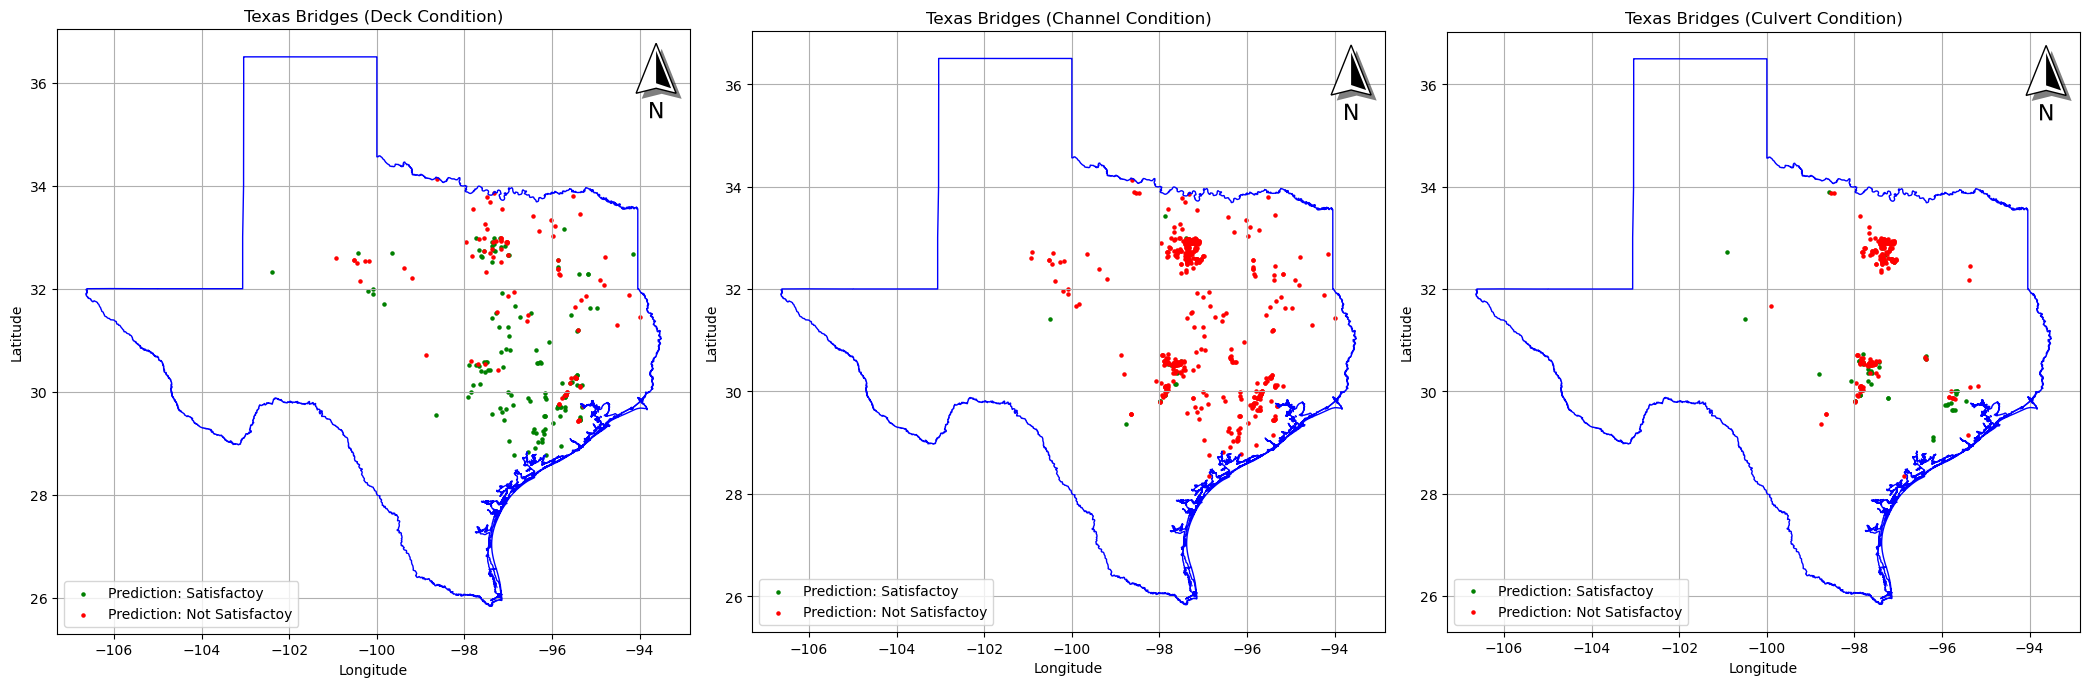

In [350]:
# Plotting all three datasets side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))

# Plot Texas boundary on all three maps (assuming texas_gpkg is your Texas boundary GeoDataFrame)
texas_gpkg.boundary.plot(ax=ax1, edgecolor='blue', linewidth=1)
texas_gpkg.boundary.plot(ax=ax2, edgecolor='blue', linewidth=1)
texas_gpkg.boundary.plot(ax=ax3, edgecolor='blue', linewidth=1)

# Plot deck points (Y_pred=1 in green, Y_pred=0 in red) on ax1
ForPlot_gdfD[ForPlot_gdfD['Y_pred'] == 1].plot(ax=ax1, marker='o', color='green', markersize=5, label='Prediction: Satisfactoy')
ForPlot_gdfD[ForPlot_gdfD['Y_pred'] == 0].plot(ax=ax1, marker='o', color='red', markersize=5, label='Prediction: Not Satisfactoy')
ax1.set_title("Texas Bridges (Deck Condition)")
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.legend(loc='lower left')

# Plot channel points (Y_pred=1 in green, Y_pred=0 in red) on ax2
ForPlot_gdfC[ForPlot_gdfC['Y_pred'] == 1].plot(ax=ax2, marker='o', color='green', markersize=5, label='Prediction: Satisfactoy')
ForPlot_gdfC[ForPlot_gdfC['Y_pred'] == 0].plot(ax=ax2, marker='o', color='red', markersize=5, label='Prediction: Not Satisfactoy')
ax2.set_title("Texas Bridges (Channel Condition)")
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
ax2.legend(loc='lower left')

# Plot culvert points (Y_pred=1 in green, Y_pred=0 in red) on ax3
ForPlot_gdfCu[ForPlot_gdfCu['Y_pred'] == 1].plot(ax=ax3, marker='o', color='green', markersize=5, label='Prediction: Satisfactoy')
ForPlot_gdfCu[ForPlot_gdfCu['Y_pred'] == 0].plot(ax=ax3, marker='o', color='red', markersize=5, label='Prediction: Not Satisfactoy')
ax3.set_title("Texas Bridges (Culvert Condition)")
ax3.set_xlabel("Longitude")
ax3.set_ylabel("Latitude")
ax3.legend(loc='lower left')

# Add north arrows to all maps (using mapu for north arrow)
mapu.north_arrow.north_arrow(ax=ax1, location='upper right', rotation={"degrees": 0})
mapu.north_arrow.north_arrow(ax=ax2, location='upper right', rotation={"degrees": 0})
mapu.north_arrow.north_arrow(ax=ax3, location='upper right', rotation={"degrees": 0})

# Display grid on all axes and show the plot
ax1.grid()
ax2.grid()
ax3.grid()

plt.tight_layout()
plt.show()


#### Plotting the Predicted State of Texas Bridges in 2023 Based on Probability Categories

In this analysis, we are visualizing the predicted state of the bridges in Texas that were not sampled in 2022 but were sampled in 2023. The logistic regression model has predicted the likelihood that each bridge falls into one of three categories based on the predicted probability. These probabilities represent the condition or class of the bridges.

##### Three Probability Categories:

1. **Low Probability (0.0 - 0.33)**: 
   - Bridges in this category have a low likelihood of being classified as "satisfactory" in the model (e.g., requiring repair or at higher risk). The low probability suggests that these bridges are predicted to be in relatively good condition.

2. **Medium Probability (0.34 - 0.66)**: 
   - Bridges falling into this category have a moderate likelihood of being classified as "satisfactory" in the model. This could indicate a borderline or uncertain prediction where the model isn't highly confident, and these bridges may need closer inspection or monitoring.

3. **High Probability (0.67 - 1.0)**: 
   - Bridges with a high predicted probability are more likely to be classified as "satisfactory" (e.g., at higher risk or needing attention). These bridges are predicted to be in poor condition or more likely to require repairs, according to the model's assessment.

Each bridge is color-coded based on the predicted probability:
- **Low Probability**: Blue
- **Medium Probability**: Orange
- **High Probability**: Red

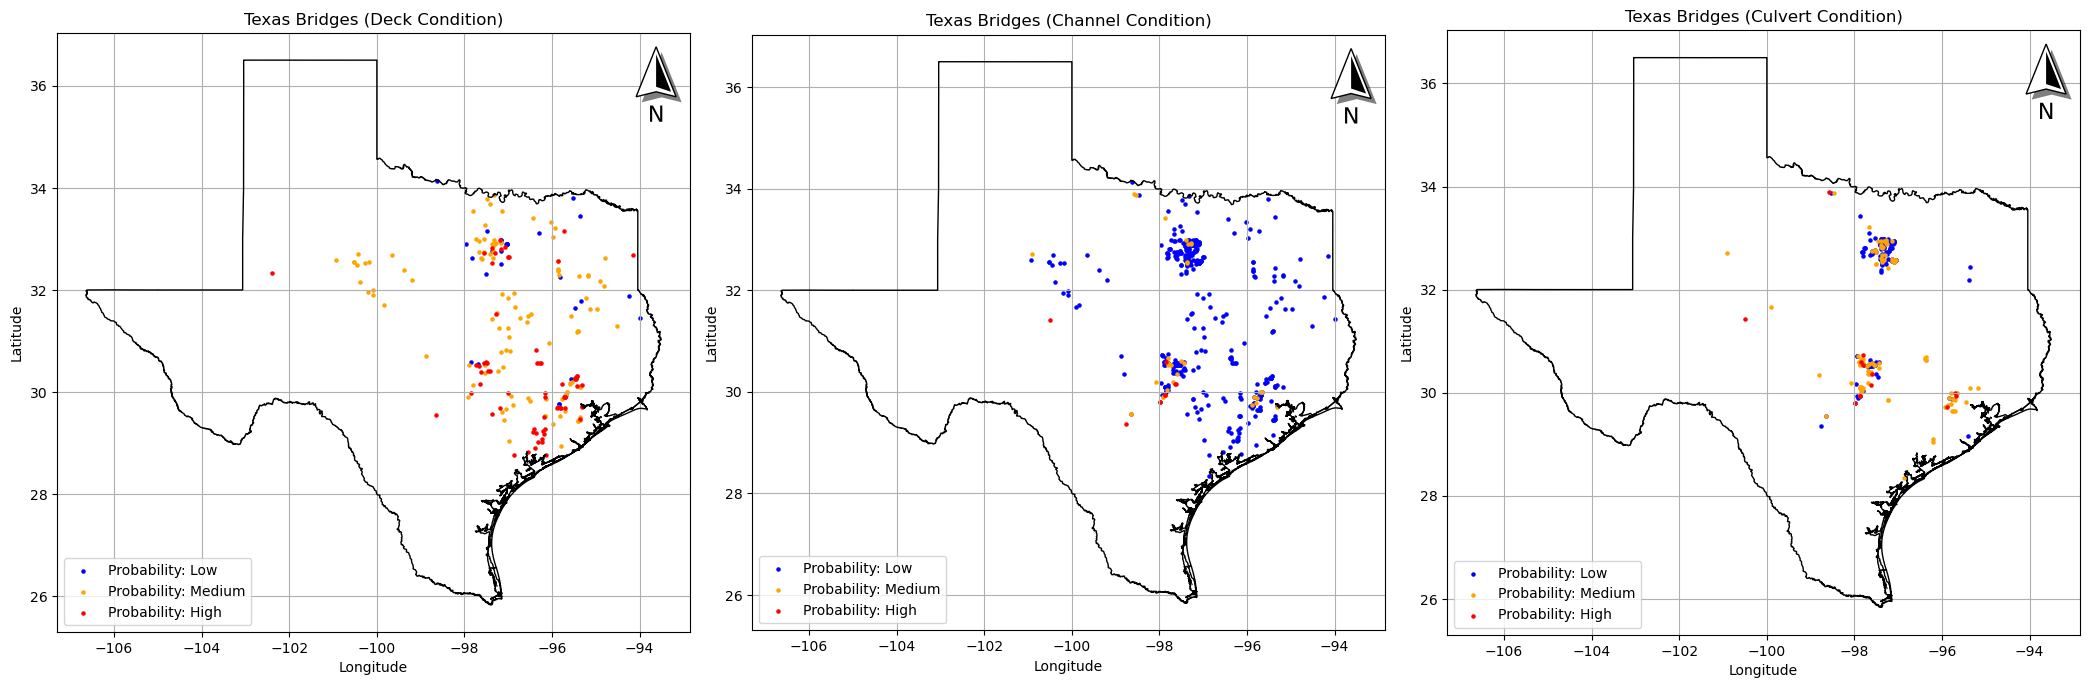

In [351]:
import matplotlib.colors as mcolors

# Function to categorize the prediction probabilities into discrete categories
def categorize_probabilities(prob):
    if prob <= 0.33:
        return 'Low'
    elif 0.33 < prob <= 0.66:
        return 'Medium'
    else:
        return 'High'

# Apply the categorization function to each dataframe
ForPlot_gdfD['Prob_Category'] = ForPlot_gdfD['Y_pred_prob'].apply(categorize_probabilities)
ForPlot_gdfC['Prob_Category'] = ForPlot_gdfC['Y_pred_prob'].apply(categorize_probabilities)
ForPlot_gdfCu['Prob_Category'] = ForPlot_gdfCu['Y_pred_prob'].apply(categorize_probabilities)

# Define colors for each category
category_colors = {'Low': 'blue', 'Medium': 'orange', 'High': 'red'}

# Plotting all three datasets side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(21, 7))

# Plot Texas boundary on all three maps (assuming texas_gpkg is your Texas boundary GeoDataFrame)
texas_gpkg.boundary.plot(ax=ax1, edgecolor='black', linewidth=1)
texas_gpkg.boundary.plot(ax=ax2, edgecolor='black', linewidth=1)
texas_gpkg.boundary.plot(ax=ax3, edgecolor='black', linewidth=1)

# Plot deck points based on the probability category
for category, color in category_colors.items():
    ForPlot_gdfD[ForPlot_gdfD['Prob_Category'] == category].plot(ax=ax1, marker='o', color=color, markersize=5, label=f'Probability: {category}')
ax1.set_title("Texas Bridges (Deck Condition)")
ax1.set_xlabel("Longitude")
ax1.set_ylabel("Latitude")
ax1.legend(loc='lower left')

# Plot channel points based on the probability category
for category, color in category_colors.items():
    ForPlot_gdfC[ForPlot_gdfC['Prob_Category'] == category].plot(ax=ax2, marker='o', color=color, markersize=5, label=f'Probability: {category}')
ax2.set_title("Texas Bridges (Channel Condition)")
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
ax2.legend(loc='lower left')

# Plot culvert points based on the probability category
for category, color in category_colors.items():
    ForPlot_gdfCu[ForPlot_gdfCu['Prob_Category'] == category].plot(ax=ax3, marker='o', color=color, markersize=5, label=f'Probability: {category}')
ax3.set_title("Texas Bridges (Culvert Condition)")
ax3.set_xlabel("Longitude")
ax3.set_ylabel("Latitude")
ax3.legend(loc='lower left')

# Add north arrows to all maps (using mapu for north arrow)
mapu.north_arrow.north_arrow(ax=ax1, location='upper right', rotation={"degrees": 0})
mapu.north_arrow.north_arrow(ax=ax2, location='upper right', rotation={"degrees": 0})
mapu.north_arrow.north_arrow(ax=ax3, location='upper right', rotation={"degrees": 0})

# Display grid on all axes and show the plot
ax1.grid()
ax2.grid()
ax3.grid()

plt.tight_layout()
plt.show()

#### Discussion of Results

The maps above display the predicted state of Texas bridges that were not sampled in 2022 but sampled in 2023. These predictions are based on the probability categories generated by a logistic regression model which was fit using the bridge sampled during the year 2022. It is plotted for three different structural elements: **Deck Condition**, **Channel Condition**, and **Culvert Condition**. The bridges are color-coded by their predicted probability of being classified as "positive" (e.g., requiring attention or repairs) into three categories:
- **Low Probability** (blue): 0.0 - 0.33
- **Medium Probability** (orange): 0.34 - 0.66
- **High Probability** (red): 0.67 - 1.0

#### Texas Bridges (Deck Condition)
In the first map, we see the predicted condition of the **deck** component of the bridges. The majority of the bridges fall into the **medium** (orange) or **high probability** (red) categories, indicating that a significant portion of bridges are at risk or require attention. The red clusters appear prominently in the southern part of the state, particularly around the coastal region, suggesting that these areas may require closer inspection.

#### Texas Bridges (Channel Condition)
The second map focuses on the **channel** component of the bridges. Here, a larger portion of the bridges are classified as **low probability** (blue), which suggests that many of the channels under these bridges are predicted to be in relatively good or statisfactory condition. However, there are still noticeable clusters of **high probability** bridges in the southern and southeastern regions, which may signal structural vulnerabilities due to environmental or waterway conditions in those areas.

#### Texas Bridges (Culvert Condition)
In the third map, we analyze the **culvert** component. Similar to the channel map, there are large areas where the bridges are classified as **low probability** (blue), particularly in the central part of the state. However, there are several **high probability** (red) points in the eastern part of Texas, which might indicate concerns related to culvert integrity in that region.

#### General Observations
Across all three maps, there is a consistent trend of higher risk bridges appearing predominantly in the southern and southeastern regions of Texas. This pattern might be attributed to environmental factors such as coastal proximity, higher rainfall, or other local stressors on bridge infrastructure. It is also noteworthy that the **channel** component shows the largest number of bridges in the **low probability** category, indicating that the channel infrastructure may generally be in better shape compared to the deck or culvert components.

#### Conclusion
This visualization provides an important tool for identifying bridges that may require immediate attention based on the predicted condition of their components. The geographic clustering of bridges with **medium** and **high probabilities** in specific regions, particularly the southern and southeastern parts of Texas, offers insights into areas where bridge inspections or maintenance activities should be prioritized. These maps can assist infrastructure planners and engineers in allocating resources more efficiently to ensure the safety and longevity of Texas' bridge network.


------

### References

Liu, H., & Zhang, Y. (2020). Bridge condition rating data modeling using deep learning algorithm. Structure and Infrastructure Engineering, 16(10), 1447-1460.

Federal Highway Administration. (1995). Recording and coding guide for the structure inventory and appraisal of the Nation's bridges (Report No. FHWA-PD-96-001). U.S. Department of Transportation. https://rosap.ntl.bts.gov/view/dot/38886

---